# Exercise 1: Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Plotting the data

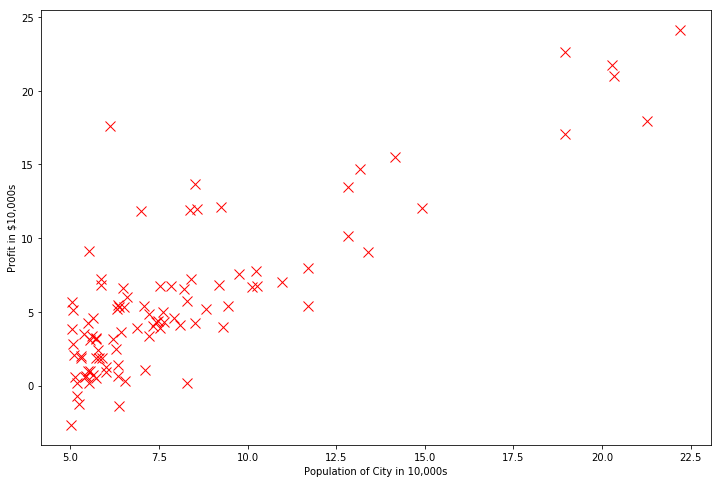

In [2]:
x, y = np.loadtxt('data/ex1data1.txt', delimiter=',', usecols=(0, 1), unpack=True)
plt.figure(figsize=(12,8))
plt.plot(x, y, 'rx', markersize=10)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

## 2. Gradient Descent

### 2.1 Computing the Cost

In [3]:
m = y.shape
# obtain number of training samples
m = m[0]
# use hstack to concatenate to column vector-like arrays, obtain a 2-column matrix
X = np.hstack((np.ones((m, 1)), np.array([x]).T))

# Cost computing function
def compute_cost(X, Y, theta):
    J = 0
    # H = theta(0) + theta(1)*x(1) + theta(2)*x(2)...
    H = np.dot(X, theta)

    # Handy way to obtain the squares
    J = np.dot((H - Y).T, (H - Y))
    J = J / (2 * m)
    return J[0, 0]

Y = np.array([y]).T
theta = np.zeros((2, 1))
print "Cost with theta = [0, 0]:", compute_cost(X, Y, theta)

Cost with theta = [0, 0]: 32.0727338775


### 2.2 Calculating Gradient Descent

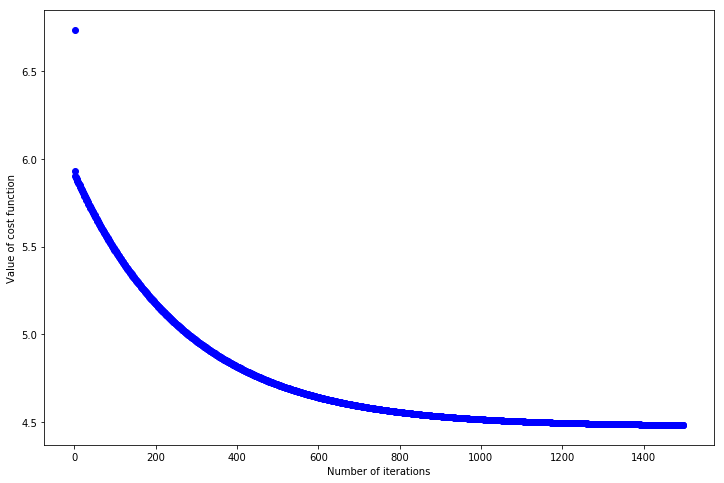

[[-3.62981201]
 [ 1.16631419]]


In [4]:
# returns updated values of theta
def gradient_descent(X, Y, inner_theta, alpha, iterations):
    # in each iteration:
    # 1. Calculate cost using compute_cost function and print it.
    #    Also, check if cost is decreasing or not.
    # 2. Update values of theta.
    
    J_values = np.array([])
    J_prev = 100000
    for i in range(1, iterations):
        J = compute_cost(X, Y, inner_theta)
        assert (J < J_prev), "Cost should be decreasing!!"
        H = np.dot(X, inner_theta)
        temp = np.dot((H - Y).T , X)
        temp = temp * alpha / m
        inner_theta = inner_theta - temp.T
        J_values = np.hstack((J_values, J))
        J_prev = J
    plt.figure(figsize=(12,8))
    plt.plot(range(1, 1499), J_values[1:], 'bo')
    plt.xlabel("Number of iterations")
    plt.ylabel("Value of cost function")
    plt.show()
    return inner_theta

alpha = 0.01
iterations = 1500
theta = gradient_descent(X, Y, theta, alpha, iterations)
print theta

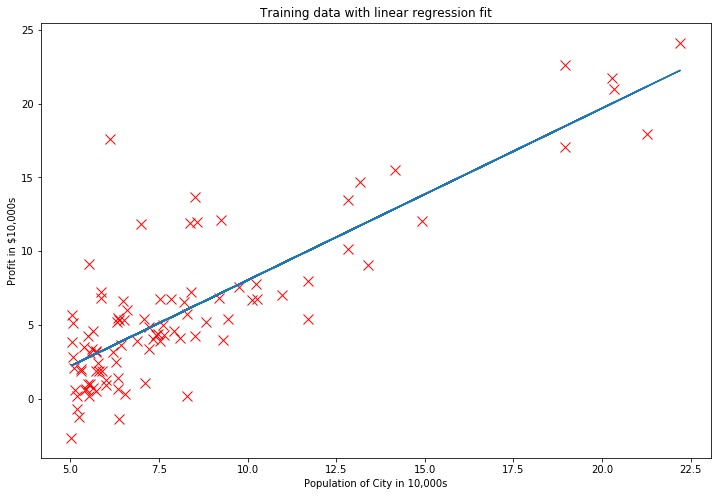

In [5]:
plt.figure(figsize=(12,8))
plt.plot(x, y, 'rx', markersize=10, label="Training data")
plt.plot(X[:,1], np.dot(X, theta), '-', label="Linear Regression")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Training data with linear regression fit')
plt.show()

## 3. Predicting Values

In [6]:
# Predict profits for a town of population 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5]), theta)
predict2 = np.dot(np.array([1, 7]), theta)
print predict1
print predict2

[ 0.45228765]
[ 4.5343873]


## 4. Visualizing J(θ)

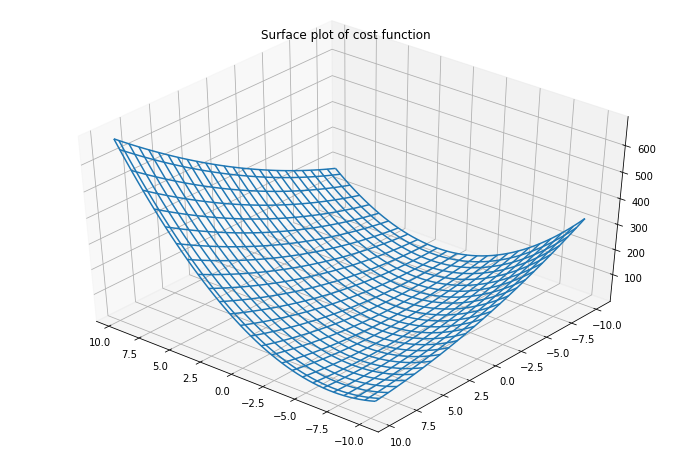

In [28]:
from mpl_toolkits.mplot3d import axes3d

x_points = np.arange(-10, 10, 0.4)
y_points = np.arange(-1, 4, 0.1)
J_values = np.empty((0, 50))

for x in x_points:
    temp = np.array([])
    for y in y_points:
        t = np.array([[x], [y]])
        temp = np.hstack((temp, compute_cost(X, Y, t)))
    J_values = np.append(J_values, np.array([temp]), axis=0)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
x_values, y_values = np.meshgrid(x_points, x_points)
ax.plot_wireframe(x_values, y_values, J_values, rstride=2, cstride=2)
ax.view_init(elev=41., azim=130)
plt.title('Surface plot of cost function')
plt.show()